In [31]:
import json

data_path = "scores_q_learning_scores_with_rockets.json"

In [32]:
with open(data_path, "r") as f:
    data = json.load(f)

In [77]:
print(max(data))

245028


In [43]:
print(f"Amount of scores in data: {len(data)}")

Amount of scores in data: 1000


In [6]:
# add graph with statistics
import matplotlib.pyplot as plt
import numpy as np


def plot_scores(data):
    scores = [score for score in data]

    plt.plot(scores)
    mean = np.mean(scores)
    std = np.std(scores)
    plt.axhline(y=mean, color="r", linestyle="--")
    plt.axhline(y=mean + std, color="g", linestyle="--")
    plt.axhline(y=mean - std, color="g", linestyle="--")

    plt.title(f"Scores of second ppo agent without rockets (mean: {mean:.2f}, std: {std:.2f})\nAmount of games: {len(scores)}")
    plt.xlabel("game")
    plt.ylabel("Score")
    plt.show()


plot_scores(data)


NameError: name 'data' is not defined

Max score without rockets:  245028
Max score with rockets:  49440


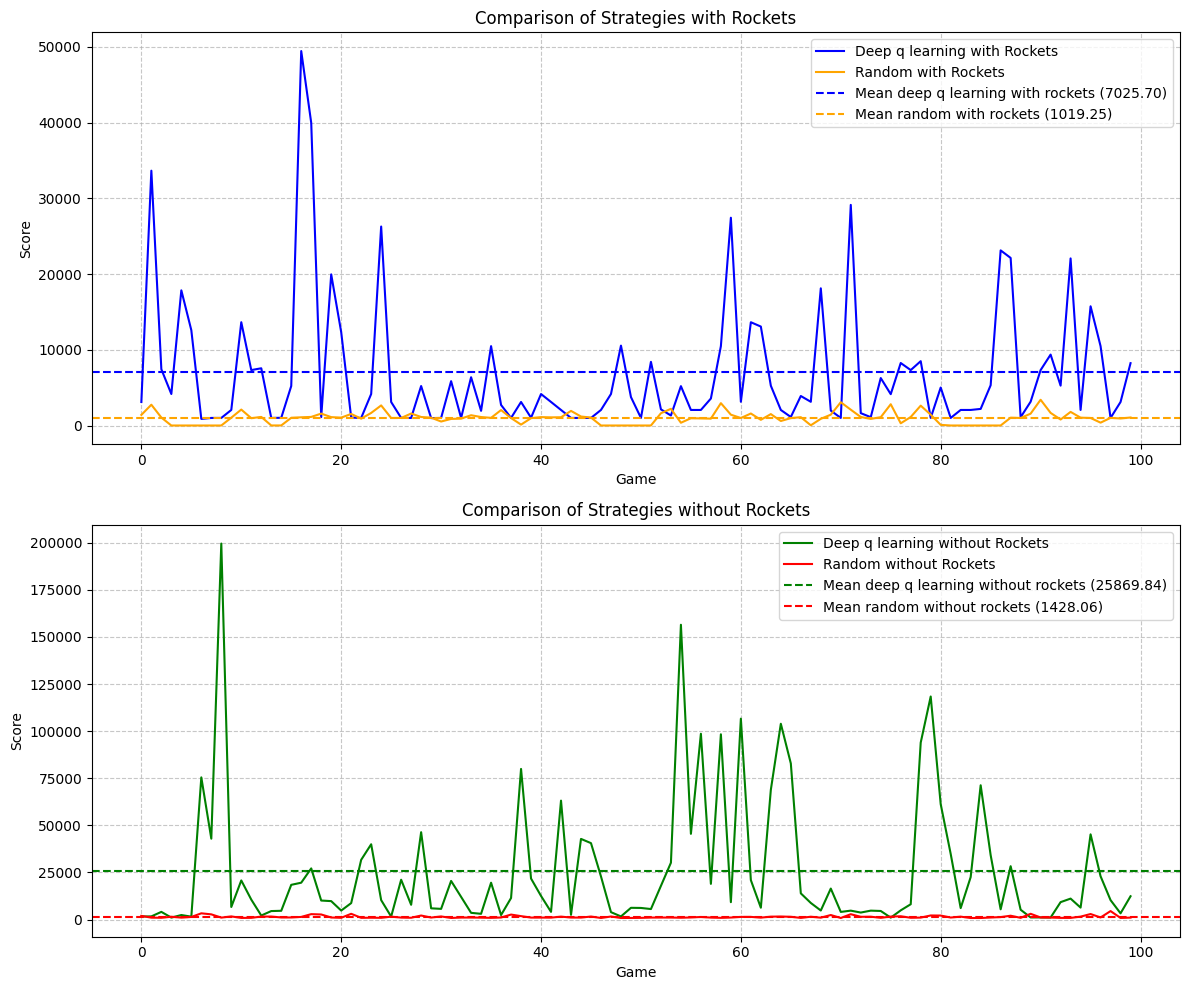

In [27]:
deep_q_scores_without_rockets_path = "scores_q_learning_scores_without_rockets.json"
deep_q_scores_with_rockets_path = "scores_q_learning_scores_with_rockets.json"

random_with_rockets_path = "random_scores_with_rockets.json"
random_without_rockets_path = "random_scores_without_rockets.json"

# load data
with open(deep_q_scores_without_rockets_path, "r") as f:
    data = json.load(f)
    deep_q_without_rockets = data[len(data) - MAX_SIZE:]

with open(deep_q_scores_with_rockets_path, "r") as f:
    data = json.load(f)
    deep_q_scores_with_rockets =  data[len(data) - MAX_SIZE:]

with open(random_with_rockets_path, "r") as f:
    random_with_rockets = json.load(f)[:MAX_SIZE]

with open(random_without_rockets_path, "r") as f:
    random_without_rockets = json.load(f)[:MAX_SIZE]


# compare without rockets and with rockets evolution and random with rockets and without rockets

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for strategies with rockets
ax1.plot(deep_q_scores_with_rockets, label='Deep q learning with Rockets', color='blue')
ax1.plot(random_with_rockets, label='Random with Rockets', color='orange')
# add means
mean = np.mean(deep_q_scores_with_rockets)
mean_random = np.mean(random_with_rockets)
ax1.axhline(y=mean, color="blue", linestyle="--", label=f"Mean deep q learning with rockets ({mean:.2f})")
ax1.axhline(y=mean_random, color="orange", linestyle="--", label=f"Mean random with rockets ({mean_random:.2f})")

ax1.set_title('Comparison of Strategies with Rockets')
ax1.set_xlabel('Game')
ax1.set_ylabel('Score')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for strategies without rockets
ax2.plot(deep_q_without_rockets, label='Deep q learning without Rockets', color='green')
ax2.plot(random_without_rockets, label='Random without Rockets', color='red')
ax2.set_title('Comparison of Strategies without Rockets')
ax2.set_xlabel('Game')
ax2.set_ylabel('Score')
# add means
mean = np.mean(deep_q_without_rockets)
mean_random = np.mean(random_without_rockets)
ax2.axhline(y=mean, color="green", linestyle="--", label=f"Mean deep q learning without rockets ({mean:.2f})")
ax2.axhline(y=mean_random, color="red", linestyle="--", label=f"Mean random without rockets ({mean_random:.2f})")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

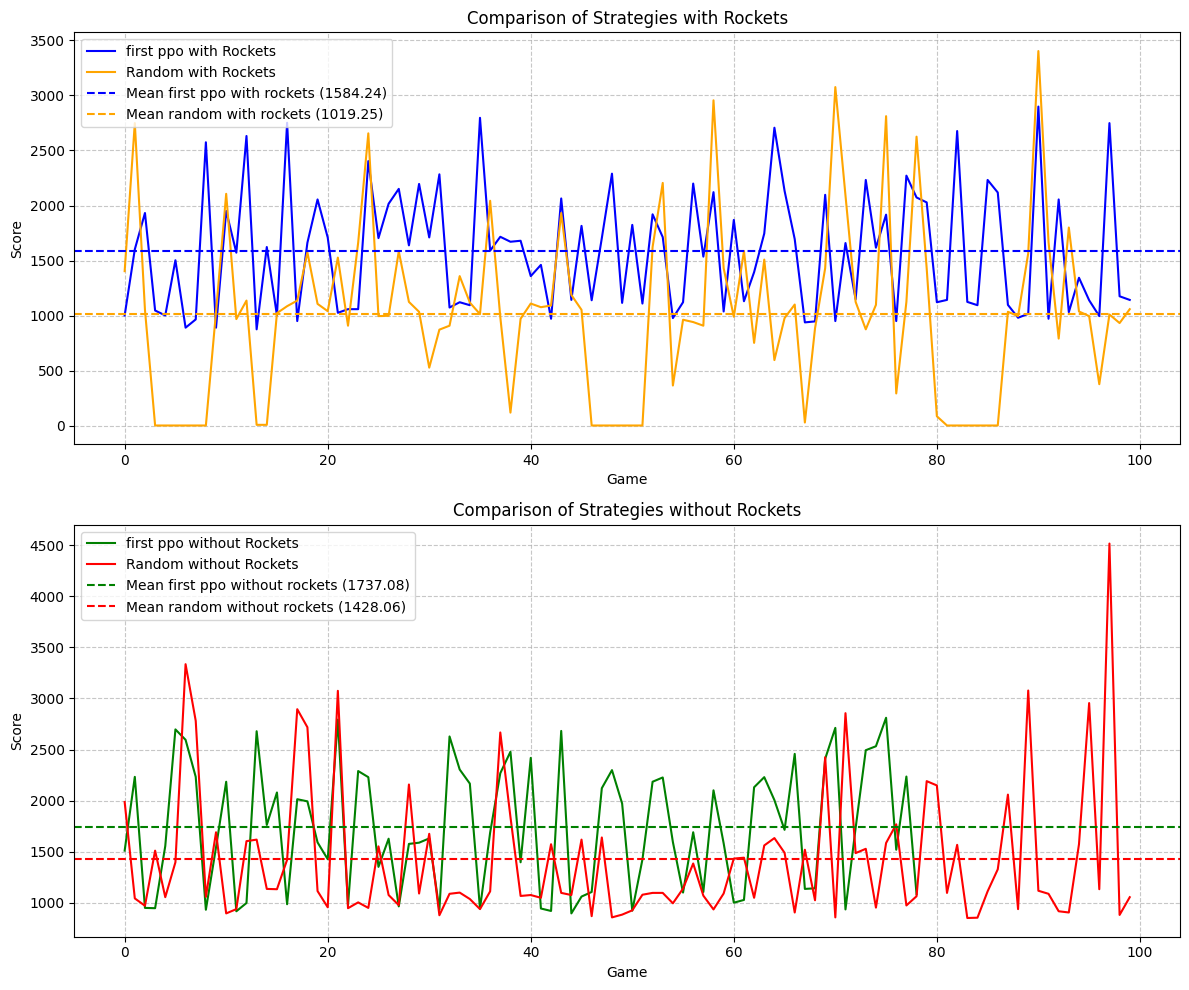

In [62]:
first_ppo_scores_without_rockets_path = "first_ppo_scores_without_rockets.json"
first_ppo_scores_with_rockets_path = "first_ppo_scores_with_rockets.json"

random_with_rockets_path = "random_scores_with_rockets.json"
random_without_rockets_path = "random_scores_without_rockets.json"

# load data
with open(first_ppo_scores_without_rockets_path, "r") as f:
    first_ppo_without_rockets = json.load(f)[MAX_SIZE - 100:MAX_SIZE]

with open(first_ppo_scores_with_rockets_path, "r") as f:
    first_ppo_scores_with_rockets = json.load(f)[MAX_SIZE - 100:MAX_SIZE]

with open(random_with_rockets_path, "r") as f:
    random_with_rockets = json.load(f)[:MAX_SIZE]

with open(random_without_rockets_path, "r") as f:
    random_without_rockets = json.load(f)[:MAX_SIZE]


# compare without rockets and with rockets evolution and random with rockets and without rockets

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for strategies with rockets
ax1.plot(first_ppo_scores_with_rockets, label='first ppo with Rockets', color='blue')
ax1.plot(random_with_rockets, label='Random with Rockets', color='orange')
# add means
mean = np.mean(first_ppo_scores_with_rockets)
mean_random = np.mean(random_with_rockets)
ax1.axhline(y=mean, color="blue", linestyle="--", label=f"Mean first ppo with rockets ({mean:.2f})")
ax1.axhline(y=mean_random, color="orange", linestyle="--", label=f"Mean random with rockets ({mean_random:.2f})")

ax1.set_title('Comparison of Strategies with Rockets')
ax1.set_xlabel('Game')
ax1.set_ylabel('Score')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for strategies without rockets
ax2.plot(first_ppo_without_rockets, label='first ppo without Rockets', color='green')
ax2.plot(random_without_rockets, label='Random without Rockets', color='red')
ax2.set_title('Comparison of Strategies without Rockets')
ax2.set_xlabel('Game')
ax2.set_ylabel('Score')
# add means
mean = np.mean(first_ppo_without_rockets)
mean_random = np.mean(random_without_rockets)
ax2.axhline(y=mean, color="green", linestyle="--", label=f"Mean first ppo without rockets ({mean:.2f})")
ax2.axhline(y=mean_random, color="red", linestyle="--", label=f"Mean random without rockets ({mean_random:.2f})")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [33]:
# table of top 5 scores and their generation
def top_scores(data, n=5):
    scores = [(i, score) for i, score in enumerate(data)]
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:n]


top_scores_results = top_scores(data)
print("Top scores:")
for i, score in top_scores_results:
    print(f"Game number: {i+1}, score: {score}")

Top scores:
Game number: 917, score: 49440
Game number: 691, score: 43122
Game number: 891, score: 39963
Game number: 918, score: 39963
Game number: 845, score: 37857
